### Librerias

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud


## Steam_Games

In [18]:
# Carga de df:
# Especifica la ruta del archivo CSV el cual ya tuvo un procesode ETL
ruta_archivo = r"M:\Documentos\Mai\Henry\Cursado\P.I. 1\Bases de datos\Archivos Post ETL\steam_post_etl.csv"

# Leer el archivo CSV
df_steam = pd.read_csv(ruta_archivo, sep=';', on_bad_lines='skip')

# Mostrar las primeras filas del DataFrame
df_steam.head(5)

,genres,title,release_date,specs,price,item_id,developer,year
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,['Single-player'],4.99,761140,Kotoshiro,2018
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,"['Single-player', 'Multi-player', 'Online Mult...",0.00,643980,Secret Level SRL,2018
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,"['Single-player', 'Multi-player', 'Online Mult...",0.00,670290,Poolians.com,2017
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,['Single-player'],0.99,767400,彼岸领域,2017
4,[],NaN,NaN,"['Single-player', 'Full controller support', '...",2.99,773570,NaN,0


### Información básica


In [19]:
# Evaluo Tamaño del dataframe
df_steam.shape

(32134, 8)

In [20]:
#Info sobre el dataframe
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32134 entries, 0 to 32133
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        32134 non-null  object 
 1   title         30084 non-null  object 
 2   release_date  29782 non-null  object 
 3   specs         31464 non-null  object 
 4   price         30746 non-null  float64
 5   item_id       32134 non-null  int64  
 6   developer     28835 non-null  object 
 7   year          32134 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.0+ MB


In [21]:
# Convertir la columna 'release_date' a formato datetime, ignorando errores
df_steam['release_date'] = pd.to_datetime(df_steam['release_date'], errors='coerce')



In [22]:
df_steam.describe()

,release_date,price,item_id,year
count,29782,30746.000000,3.213400e+04,32134.000000
mean,2015-04-21 09:18:30.388825600,8.868348,4.517243e+05,1867.291809
min,1970-07-15 00:00:00,0.000000,0.000000e+00,0.000000
25%,2014-10-01 00:00:00,2.990000,3.292625e+05,2014.000000
50%,2016-04-18 00:00:00,4.990000,4.519950e+05,2016.000000
75%,2017-04-17 00:00:00,9.990000,5.933875e+05,2017.000000
max,2021-12-31 00:00:00,995.000000,2.028850e+06,2021.000000
std,NaN,15.903012,1.827437e+05,524.770815


In [23]:
# Analisis de Outliers
# Analisis de release_date: FECHA MAS ANTIGUA 
df_steam[df_steam['release_date'] == df_steam['release_date'].min()]

#Se corrobora la fecha antigua en la url correspondiendo al juego "Last Train To Berlin"

,genres,title,release_date,specs,price,item_id,developer,year
14846,[],Last Train To Berlin,1970-07-15,['Captions available'],3.99,734030,NaN,1970


### Analisis de precios


Se realiza un histograma de la distribución de precios que nos permite observar cómo se distribuyen los precios de los juegos en la plataforma

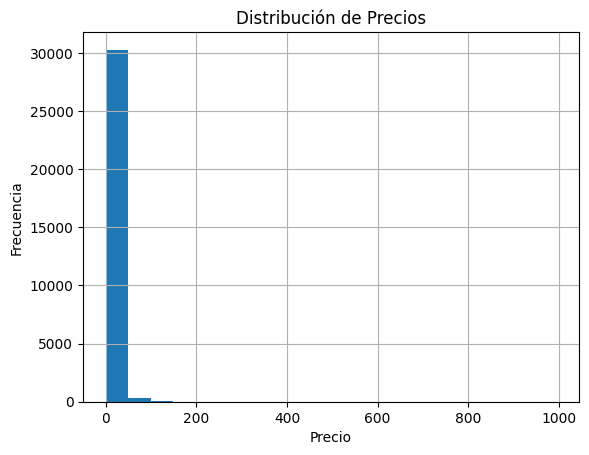

In [24]:
#Creación de histograma para analizar distribución de precios
df_steam['price'].hist(bins=20)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()
#Se pueden identificar la mayor cantidad de juegos desde 0 a 50 USD 

Se realiza un boxplot para visualizar la distribución de los precios de los juegos en el dataframe df_steam

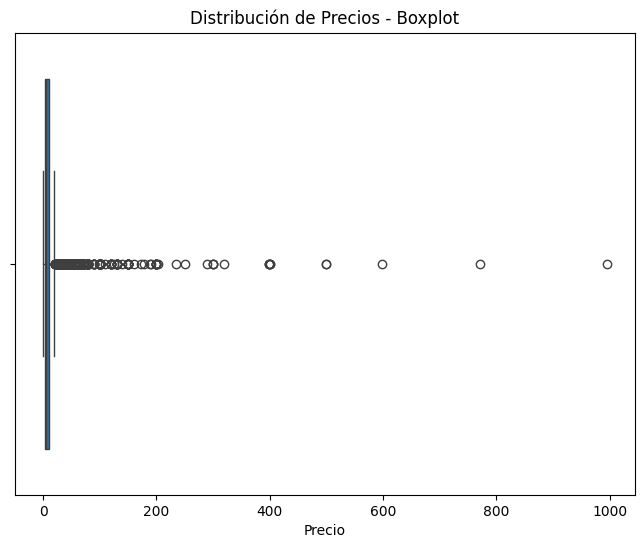

In [25]:
# Crear el boxplot para la columna 'price' para visualizar mejor los valores extremos
plt.figure(figsize=(8,6))
sns.boxplot(x=df_steam['price'])

plt.title('Distribución de Precios - Boxplot')
plt.xlabel('Precio')

plt.show()

Se verifica si algunos de los valores extremos son erorres

In [26]:
#Analisis de price: PRECIO MAS ALTO
df_steam[df_steam['price'] == df_steam['price'].max()]
#Se corrobora el precio en la web correspondiendo al juego "Strata Spaces VR – Professional Edition Upgrade	"

,genres,title,release_date,specs,price,item_id,developer,year
12088,"['Animation &amp; Modeling', 'Design &amp; Ill...",Strata Spaces VR – Professional Edition Upgrade,2017-10-26,"['Downloadable Content', 'Steam Achievements',...",995.0,719000,"Strata Mixed Reality, Inc.",2017


### Analisis de géneros


Se hace la apertura de la columna Genres para su analisis individual

In [27]:
# Asegurarse de que la columna 'genres' sea de tipo lista
df_steam['genres'] = df_steam['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Asegurarse de que los elementos sean listas
df_steam['genres'] = df_steam['genres'].apply(lambda x: x if isinstance(x, list) else [])

# Explota la columna 'genres' para separar los géneros individuales
df_exploded = df_steam.explode('genres').reset_index(drop=True)


# Mostrar el nuevo dataframe
df_exploded.head(2)



,genres,title,release_date,specs,price,item_id,developer,year
0,Action,Lost Summoner Kitty,2018-01-04,['Single-player'],4.99,761140,Kotoshiro,2018
1,Casual,Lost Summoner Kitty,2018-01-04,['Single-player'],4.99,761140,Kotoshiro,2018


Se analiza la frecuencia de cada género de juego, lo que permite observar la popularidad y la diversidad de los géneros en la plataforma

In [28]:
# Contar la frecuencia de cada género
genre_frecuencia = df_exploded['genres'].value_counts()
genre_frecuencia

genres
Indie                        15858
Action                       11320
Casual                        8282
Adventure                     8243
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

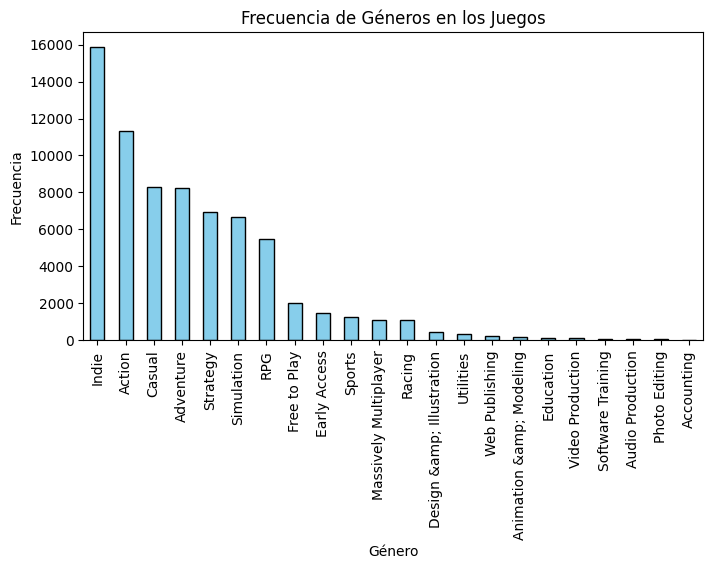

In [29]:
# Graficar la frecuencia de los géneros
genre_frecuencia.plot(kind='bar', figsize=(8,4), color='skyblue', edgecolor='black')
plt.title('Frecuencia de Géneros en los Juegos')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()
# Indie, Action, Casual y Adventure son los generos que más se dan en los Juegos de la paltaforma


Se genera un histograma que muestra la distribución del número de géneros por juego

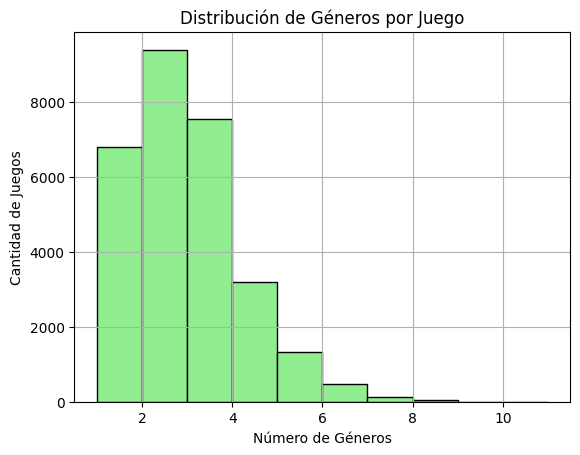

In [31]:
# Calcular cuántos géneros tiene cada juego
df_steam['num_genres'] = df_steam['genres'].apply(len)

# Histograma del número de géneros por juego
df_steam['num_genres'].hist(bins=range(1, df_steam['num_genres'].max() + 1), edgecolor='black', color='lightgreen')
plt.title('Distribución de Géneros por Juego')
plt.xlabel('Número de Géneros')
plt.ylabel('Cantidad de Juegos')
plt.show()
# La mayoria de los juegos tienen entre 1 y 4 géneros

Generar una nube de palabras para visualizar la frecuencia de los géneros usando la biblioteca wordcloud  buscando  captar rápidamente cuáles son los géneros más populares y cómo se distribuyen 

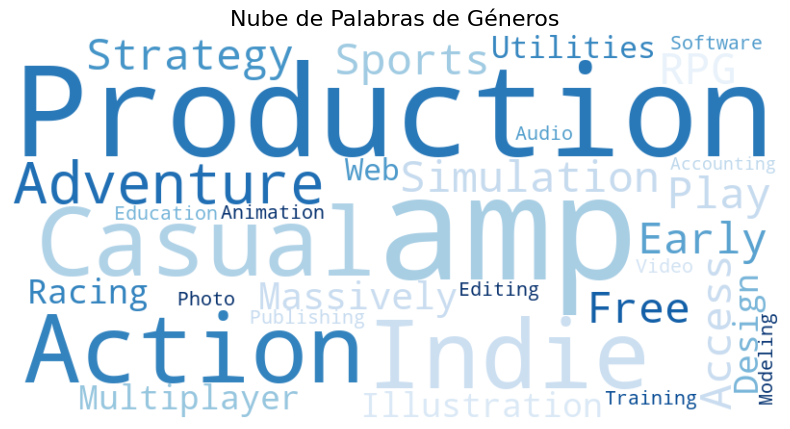

In [32]:
# Crear una nube de palabras para la columna Genero
all_genres = ' '.join(genre_frecuencia.index)  # Obtiene los géneros

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(all_genres)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.title('Nube de Palabras de Géneros', fontsize=16)
plt.show()


Se analiza cómo varía el precio de los juegos según los géneros  usando un boxplot. Esto nos mostrará la mediana y la dispersión de precios para cada género, permitiéndonos ver si algunos géneros son más costosos que otros.

C:\Users\Flor Pedraza\AppData\Local\Temp\ipykernel_21232\3662639121.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genres', y='price', data=df_exploded, palette='Set2')


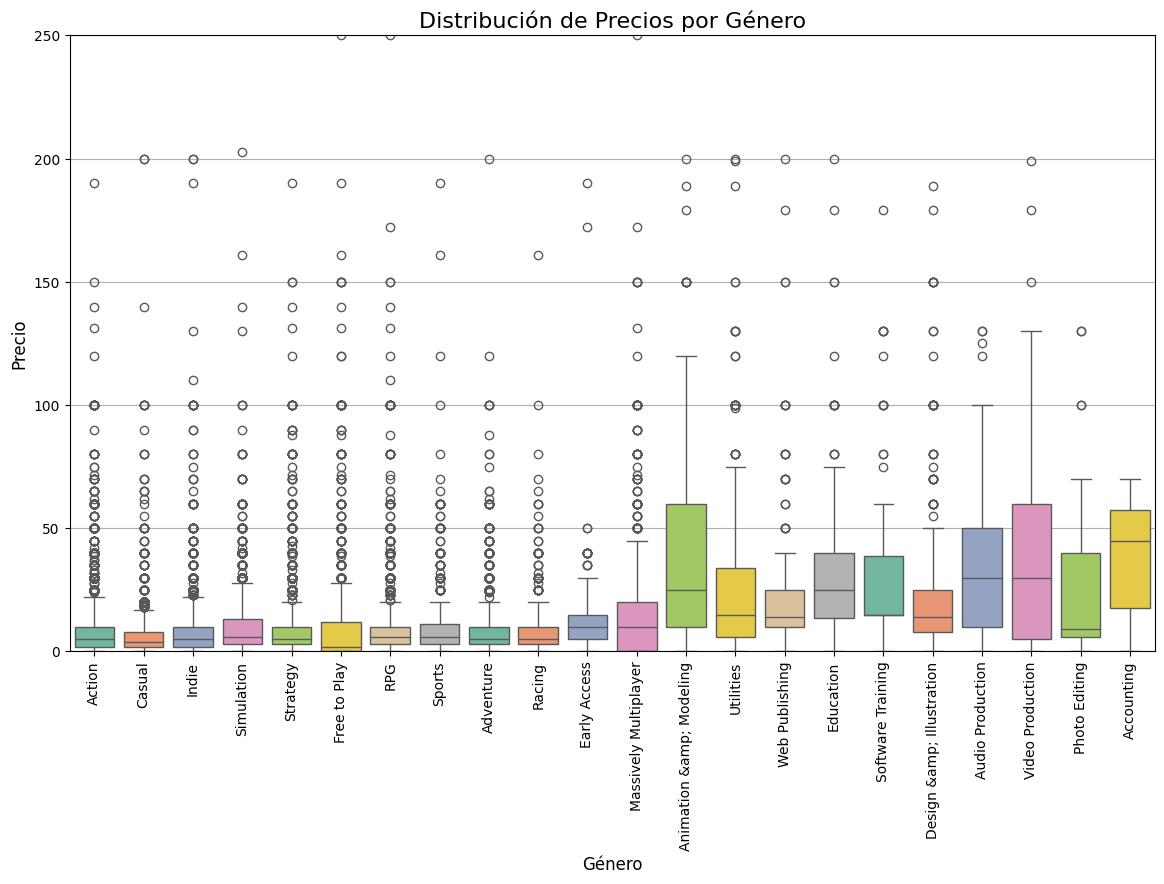

In [33]:
df_exploded = df_steam.explode('genres').reset_index(drop=True)

# Verifica si hay duplicados
duplicates = df_exploded.duplicated(subset=['genres', 'price'], keep=False)

# Filtra los NaN en la columna 'price'
df_exploded = df_exploded[df_exploded['price'].notna()]

# Crear un boxplot para observar la relación entre género y precio
plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='price', data=df_exploded, palette='Set2')
plt.title('Distribución de Precios por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Precio', fontsize=12)

# Limitar el rango de la columna 'price' de 0 a 250 para analizar donde estan la mayoría de los datos
plt.ylim(0, 250)

plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

# Géneros con Precios Más Altos: Los géneros como "Massively Multiplayer" y "Video Production" presentan precios más altos en comparación con otros géneros.

# Géneros Gratuitos y Bajos Precios: Por otro lado, géneros como "Free to Play" y "Casual" tienen una mayor concentración de precios en los rangos más bajos.

Se realiza un gráfico de barras que presenta el número de desarrolladores por género de juegos y nos permite visualizar cuántos desarrolladores están involucrados en la creación de juegos para cada uno de los géneros

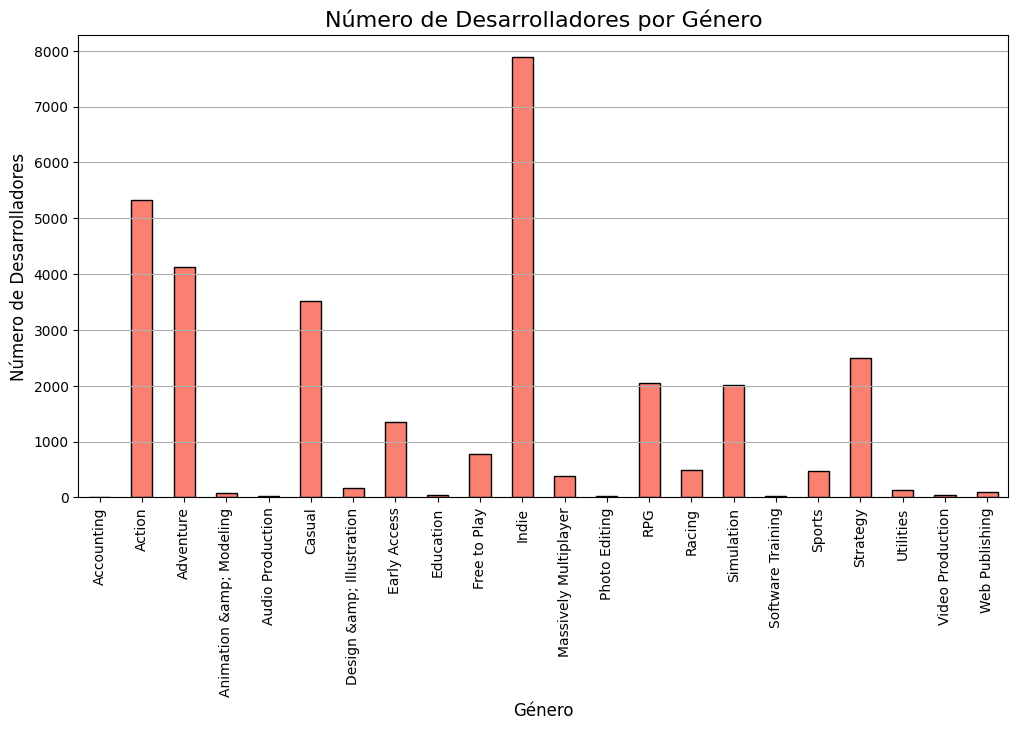

Número de desarrolladores por género:
 genres
Accounting                      4
Action                       5325
Adventure                    4126
Animation &amp; Modeling       77
Audio Production               29
Casual                       3520
Design &amp; Illustration     166
Early Access                 1349
Education                      47
Free to Play                  774
Indie                        7878
Massively Multiplayer         391
Photo Editing                  24
RPG                          2044
Racing                        499
Simulation                   2006
Software Training              32
Sports                        469
Strategy                     2499
Utilities                     128
Video Production               41
Web Publishing                 90
Name: developer, dtype: int64


In [34]:
# Contar cuántos desarrolladores hay por género
developer_cantidad = df_exploded.groupby('genres')['developer'].nunique()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
developer_cantidad.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Número de Desarrolladores por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Desarrolladores', fontsize=12)
# plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Mostrar la cantidad de desarrolladores por género
print("Número de desarrolladores por género:\n", developer_cantidad)

# Dominancia del Género Indie: Este género sobresale notablemente en el gráfico, con un número de desarrolladores que supera los 7,000.
# Otros Géneros: Los géneros como Acción, Aventura, y Causal también cuentan con un número significativo de desarrolladores
# Géneros con Menor Participación: como Educación, Simulación, y Estrategia.


### Analisis de especificaciones

In [35]:
# Asegurarse de que la columna 'genres' sea de tipo lista
df_steam['specs'] = df_steam['specs'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Asegurarse de que los elementos sean listas
df_steam['specs'] = df_steam['specs'].apply(lambda x: x if isinstance(x, list) else [])

# Explota la columna 'genres' para separar los géneros individuales

df_exploded = df_steam.explode('specs').reset_index(drop=True)


# Mostrar el nuevo dataframe
df_exploded.head(2)

,genres,title,release_date,specs,price,item_id,developer,year,num_genres
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,Single-player,4.99,761140,Kotoshiro,2018,5
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,Single-player,0.00,643980,Secret Level SRL,2018,4


In [36]:
# Contar la frecuencia de cada specs
specs_cantidad = df_exploded['specs'].value_counts()
specs_cantidad

specs
Single-player                 27576
Steam Achievements            16365
Downloadable Content          12691
Steam Trading Cards           12199
Steam Cloud                    9959
Multi-player                   8198
Full controller support        7384
Partial Controller Support     6539
Steam Leaderboards             6081
Co-op                          4280
Shared/Split Screen            3962
Cross-Platform Multiplayer     2550
Online Multi-Player            2370
Stats                          2321
HTC Vive                       1984
Steam Workshop                 1866
Tracked Motion Controllers     1816
Captions available             1643
Standing                       1462
Room-Scale                     1445
Includes level editor          1377
Local Multi-Player             1237
Oculus Rift                    1213
Seated                         1090
Online Co-op                    998
MMO                             942
In-App Purchases                933
Local Co-op           

Se muestra la frecuencia de las especificaciones en los juegos 

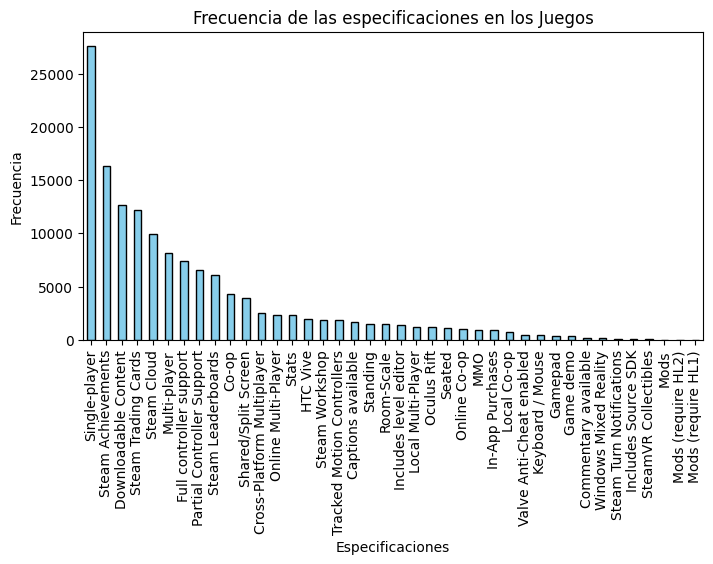

In [37]:
# Graficar la frecuencia de las especificaciones
specs_cantidad.plot(kind='bar', figsize=(8,4), color='skyblue', edgecolor='black')
plt.title('Frecuencia de las especificaciones en los Juegos')
plt.xlabel('Especificaciones')
plt.ylabel('Frecuencia')
plt.show()

# Se puede observar como la especificación "Single-player" es la característica que más se repite en los juegos analizados.

Se genera una nube de palabras a partir de la columna de especificaciones (Specs) de los juegos proporcionando una representación visual de las especificaciones más comunes y relevantes en el conjunto de datos (usando la biblioteca wordcloud)

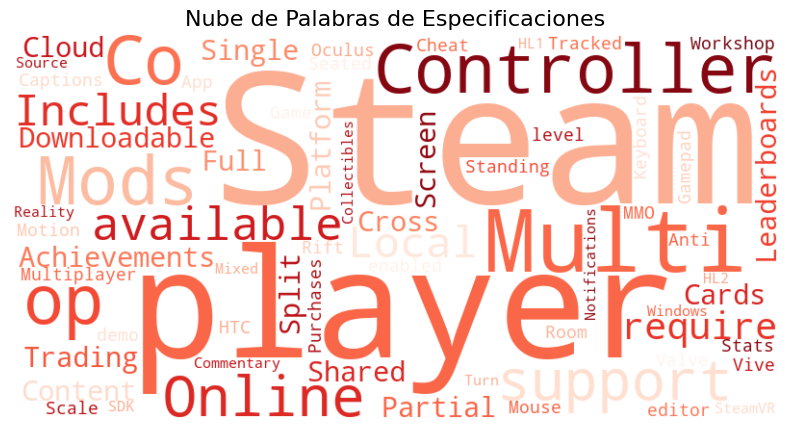

In [38]:
# Generar una nube de palabras para visualizar la frecuencia de las especificaciones usando la biblioteca wordcloud

# Crear una nube de palabras para la columna Specs
all_genres = ' '.join(specs_cantidad.index)  # Obtiene los géneros

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(all_genres)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.title('Nube de Palabras de Especificaciones', fontsize=16)
plt.show()

### Analisis por fecha

In [39]:
df_steam['release_date'] = pd.to_datetime(df_steam['release_date'], errors='coerce')
df_steam['release_date'].describe()



count                            29782
mean     2015-04-21 09:18:30.388825600
min                1970-07-15 00:00:00
25%                2014-10-01 00:00:00
50%                2016-04-18 00:00:00
75%                2017-04-17 00:00:00
max                2021-12-31 00:00:00
Name: release_date, dtype: object

Se pretende analizar la distribución de juegos por año mendiante un gráfico de barras para mostrar cuántos juegos se lanzaron cada año

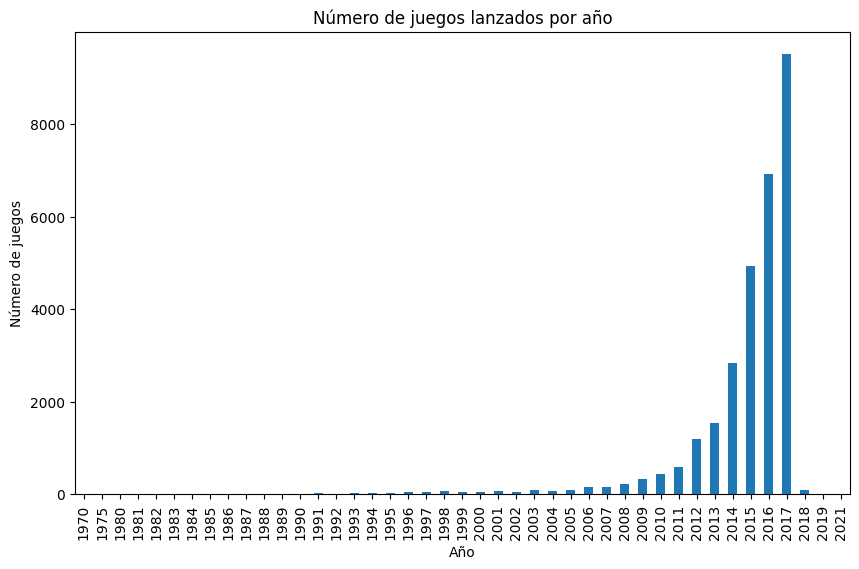

In [40]:
# Eliminar filas donde 'release_date' es NaN
df_steam = df_steam.dropna(subset=['release_date'])

# Extraer el año y convertirlo a tipo entero
df_steam['year'] = df_steam['release_date'].dt.year.astype(int)
df_steam['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.xticks(rotation=90)
plt.show()

#Se puede observar una evolución incremental notoria desde 2005 a 2017


Asimismo evaluamos la tendencia de lanzamientos a lo largo del tiempo mediante un gráfico de líneas para visualizar la tendencia de lanzamientos a lo largo del tiempo

C:\Users\Flor Pedraza\AppData\Local\Temp\ipykernel_21232\1535138730.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_steam.set_index('release_date').resample('M').size().plot(figsize=(12, 6))


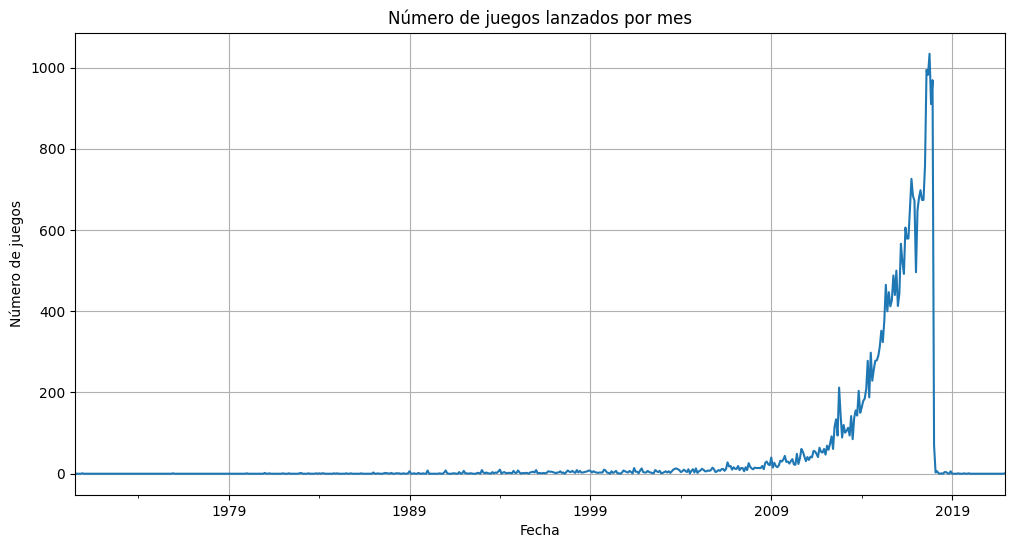

In [41]:

df_steam.set_index('release_date').resample('M').size().plot(figsize=(12, 6))
plt.title('Número de juegos lanzados por mes')
plt.xlabel('Fecha')
plt.ylabel('Número de juegos')
plt.grid()
plt.show()


## User_Items

In [48]:
# Especifica la ruta del archivo CSV el cual ya tuvo un procesode ETL
ruta_archivo = r"M:\Documentos\Mai\Henry\Cursado\P.I. 1\Bases de datos\Archivos Post ETL\items_post_etl.parquet"

# Leer el archivo PARQUET
df_items = pd.read_parquet(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df_items.head(5)

,user_id,item_id,playtime_forever,price
0,76561197970982479,10,0.10,9.99
1,76561197970982479,20,0.00,4.99
2,76561197970982479,30,0.12,4.99
3,76561197970982479,40,0.00,4.99
4,76561197970982479,50,0.00,4.99


### Analisis por horas de juego

In [49]:
# Merge de los DataFrames Steam + Items en base a 'item_id'
# Convertir 'item_id' a string en ambos DataFrames
df_steam['item_id'] = df_steam['item_id'].astype(str)
df_items['item_id'] = df_items['item_id'].astype(str)
df_merged = pd.merge(df_steam, df_items[['item_id', 'playtime_forever']], on='item_id', how='left')
df_merged.head()


,genres,title,release_date,specs,price,item_id,developer,year,num_genres,playtime_forever
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,[Single-player],4.99,761140,Kotoshiro,2018,5,NaN
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...",0.00,643980,Secret Level SRL,2018,4,NaN
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,"[Single-player, Multi-player, Online Multi-Pla...",0.00,670290,Poolians.com,2017,5,NaN
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,[Single-player],0.99,767400,彼岸领域,2017,3,NaN
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,"[Single-player, Steam Achievements]",3.99,772540,Trickjump Games Ltd,2018,3,NaN


In [50]:
# Calcular la cantidad total de horas jugadas por juego
total_playtime_per_game = df_merged.groupby('item_id')['playtime_forever'].sum().reset_index()

# Si deseas incluir el título del juego, puedes unir esta información
total_playtime_per_game = pd.merge(total_playtime_per_game, df_steam[['item_id', 'title']], on='item_id', how='left')
total_playtime_per_game = total_playtime_per_game[total_playtime_per_game['title'].notna()]

# Renombrar la columna para mayor claridad
total_playtime_per_game.rename(columns={'playtime_forever': 'total_playtime_hours'}, inplace=True)


#ordenar el dataframe
total_playtime_per_game = total_playtime_per_game.sort_values(by='total_playtime_hours', ascending=False)

# Verificar los primeros registros
total_playtime_per_game.head()


,item_id,total_playtime_hours,title
28208,730,12930271.35,Counter-Strike: Global Offensive
11720,4000,7364518.02,Garry's Mod
46,105600,2549960.48,Terraria
1987,230410,2045448.69,Warframe
2318,240,1855246.15,Counter-Strike: Source


Se realiza un gráfico de barras que presenta el Top 10 juegos por total de horas jugadas, proporcionando una visión gráfica de cuáles son los juegos más populares entre los jugadores en términos de tiempo de juego acumulado

<Figure size 1200x600 with 0 Axes>

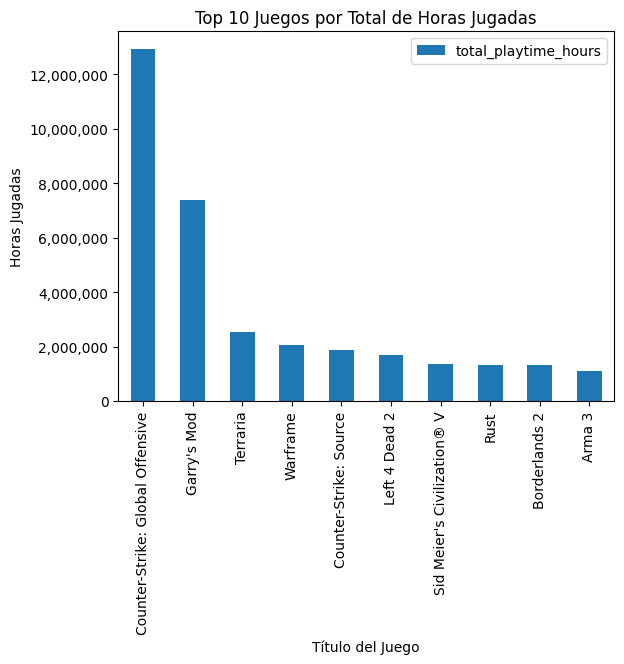

In [51]:

plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
ax = total_playtime_per_game.sort_values(by='total_playtime_hours', ascending=False).head(10).plot(kind='bar', x='title', y='total_playtime_hours')

# Configurar el título y etiquetas
plt.title('Top 10 Juegos por Total de Horas Jugadas')
plt.xlabel('Título del Juego')
plt.ylabel('Horas Jugadas')

# Evitar notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()



## Reviews

In [52]:
# Especifica la ruta del archivo CSV el cual ya tuvo un procesode ETL
ruta_archivo = r"M:\Documentos\Mai\Henry\Cursado\P.I. 1\Bases de datos\Archivos Post ETL\reviews_post_etl.csv"

# Leer el archivo CSV
df_review = pd.read_csv(ruta_archivo, sep=';', on_bad_lines='skip')

# Mostrar las primeras filas del DataFrame
df_review.head(5)

,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
1,76561197970982479,22200,True,2
2,76561197970982479,43110,True,2
3,js41637,251610,True,2
4,js41637,227300,True,2


In [55]:
# Agregar columna "title" para hacer mas fáciles de entender los analisis y graficos

# Realizar el merge entre df_review y df_steam para agregar la columna title
df_review['item_id'] = df_review['item_id'].astype(str)
df_reviews_merged = pd.merge(df_review, df_steam[['item_id', 'title', "price"]], on='item_id', how='left')

# Mostrar las primeras filas del dataframe resultante
df_reviews_merged.head()


,user_id,item_id,recommend,sentiment_analysis,title,price
0,76561197970982479,1250,True,2,Killing Floor,19.99
1,76561197970982479,22200,True,2,Zeno Clash,9.99
2,76561197970982479,43110,True,2,NaN,NaN
3,js41637,251610,True,2,NaN,NaN
4,js41637,227300,True,2,Euro Truck Simulator 2,19.99


### Analisis de Remendaciones, Sentimientos y su relación con precio

Se nalizan mediante un grafico de barras cuántos juegos han sido recomendados (True) y cuántos no (False).

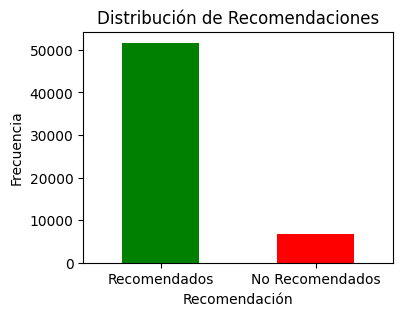

In [56]:
df_reviews_merged['recommend'].value_counts().plot(kind='bar', color=['green', 'red'], figsize=(4,3))
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendación')
plt.ylabel('Frecuencia')
plt.xticks([0,1], ['Recomendados', 'No Recomendados'], rotation=0)

plt.show()
#Se demuestra que son ampliamente superiores los juegos recomendados que los que no.


Se realiza un gráfico de barras que represente la distribución de sentimientos en el conjunto de datos y asi ilustrar el análisis de sentimiento realizado previamente

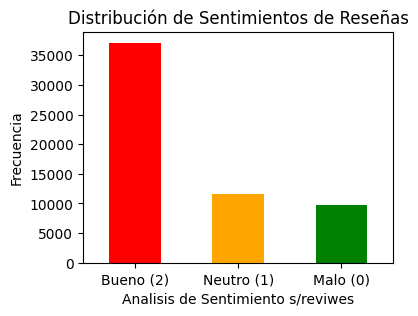

In [57]:
# Distribución del análisis de sentimiento realizado en NLP(sentiment_analysis), que se clasificó como 0 (malo), 1 (neutro), o 2 (bueno).
df_reviews_merged['sentiment_analysis'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'], figsize=(4,3))
plt.title('Distribución de Sentimientos de Reseñas')
plt.xlabel('Analisis de Sentimiento s/reviwes')
plt.ylabel('Frecuencia')
plt.xticks([0,1,2], ['Bueno (2)', 'Neutro (1)','Malo (0)'], rotation=0)
plt.show()
#Se demuestra que son ampliamente superiores los juegos con buenos reviews y se encuentra bastante equilibrado los Neutros y Malos.


Se realiza un gráfico de barras apiladas para visualizar la relación entre las recomendaciones de los usuarios y sus sentimientos permitiendo observar  cómo se distribuyen las recomendaciones en función de las diferentes categorías de análisis de sentimiento.

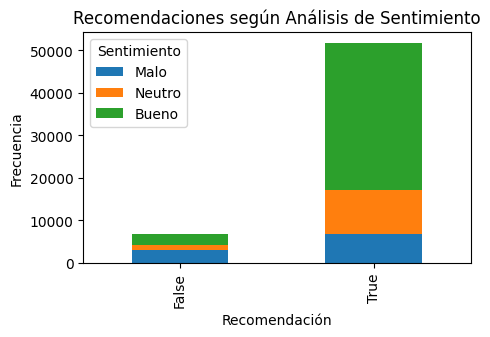

In [58]:
# Se busca la relación entre Recomendaciones y Análisis de Sentimiento.
# Distribución las recomendaciones según el análisis de sentimiento:

pd.crosstab(df_reviews_merged['recommend'], df_reviews_merged['sentiment_analysis']).plot(kind='bar', stacked=True, figsize=(5,3))
plt.title('Recomendaciones según Análisis de Sentimiento')
plt.xlabel('Recomendación')
plt.ylabel('Frecuencia')
plt.legend(['Malo', 'Neutro', 'Bueno'], title='Sentimiento')
plt.show()


Se generan gráficos de barras en paralelo para comparar dos conjuntos de datos: los juegos más reseñados y los juegos más recomendados. Los gráficos se han dispuesto lado a lado para facilitar la visualización y comparación directa de la información.

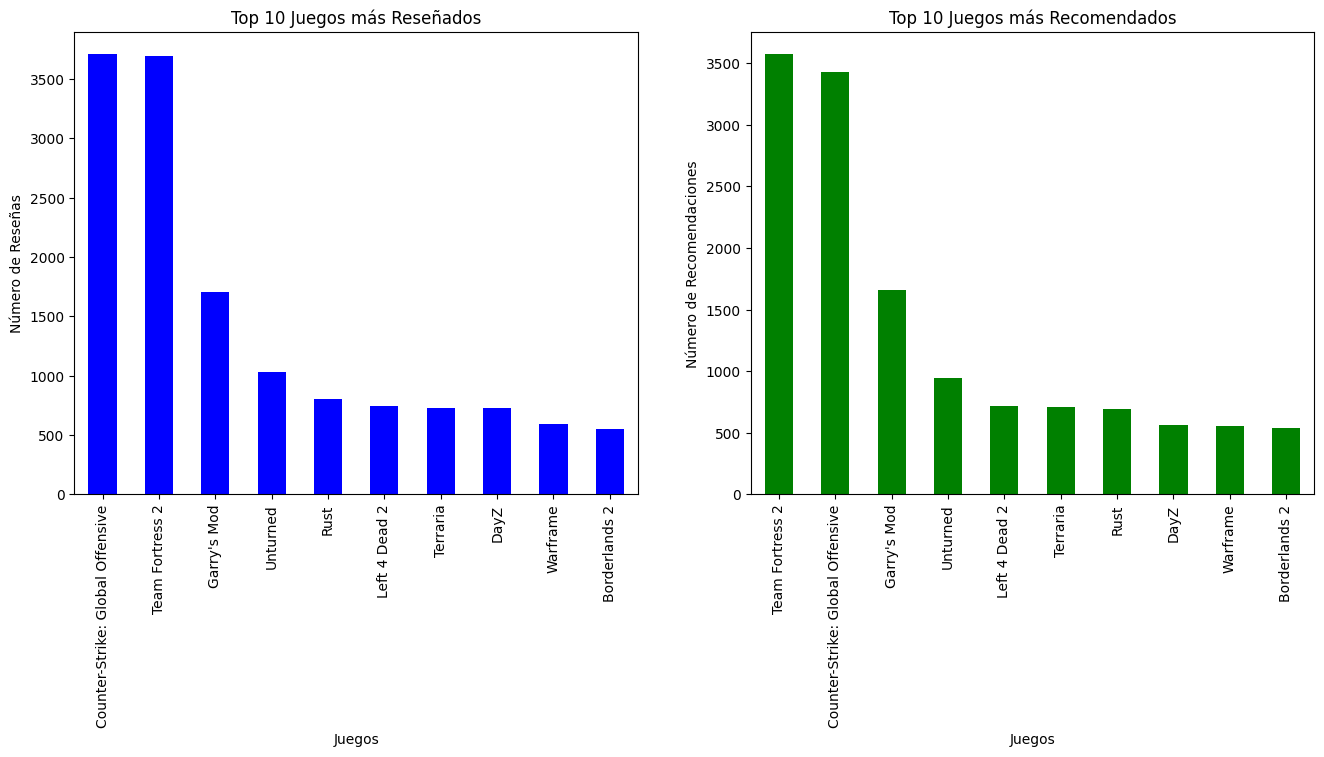

In [59]:
#Comparar dos graficos, top de juegos reseñados y top de juegos recomendados

# Crear dos graficos en pararlelo para su comparación
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Juegos más reseñados
top_games = df_reviews_merged['title'].value_counts().head(10)
top_games.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Top 10 Juegos más Reseñados')
ax[0].set_xlabel('Juegos')
ax[0].set_ylabel('Número de Reseñas')
ax[0].tick_params(axis='x')

# Gráfico 2: Juegos más recomendados
top_recommended_games = df_reviews_merged[df_reviews_merged['recommend'] == True]['title'].value_counts().head(10)
top_recommended_games.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Top 10 Juegos más Recomendados')
ax[1].set_xlabel('Juegos')
ax[1].set_ylabel('Número de Recomendaciones')
ax[1].tick_params(axis='x')

plt.show()



Se busca realizar dos gráficos de torta, uno para los juegos recomendados y otro para los no recomendados, mostrando la proporción de juegos gratis y pagos para cada uno de ellos.


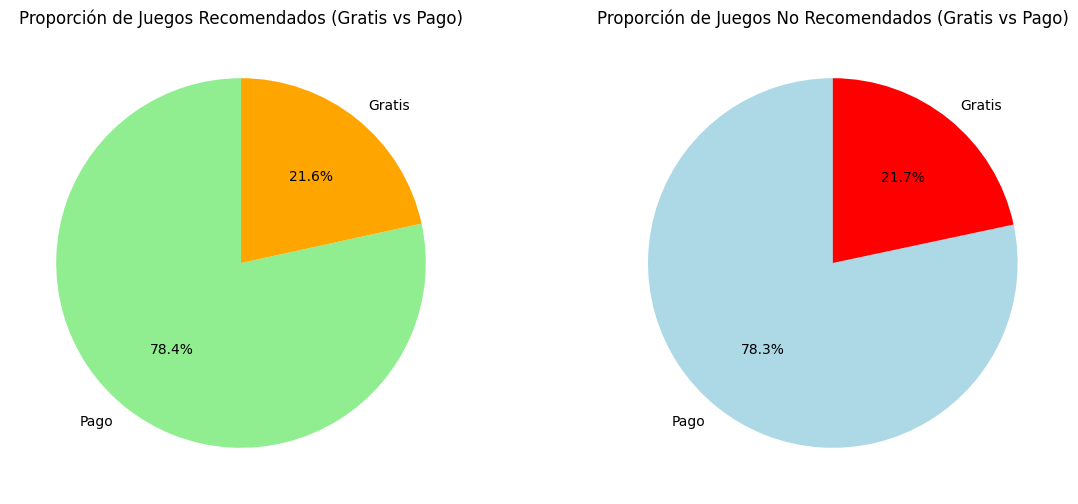

In [60]:
# Crear una nueva columna que clasifique los juegos como 'Gratis' o 'Pago'
df_reviews_merged['price_category'] = df_reviews_merged['price'].apply(lambda x: 'Gratis' if x == 0 else 'Pago')

# Crear una tabla cruzada entre 'recommend' y 'price_category'
crosstab = pd.crosstab(df_reviews_merged['recommend'], df_reviews_merged['price_category'])

# Filtrar juegos recomendados y no recomendados
recom_games = df_reviews_merged[df_reviews_merged['recommend'] == True]['price_category'].value_counts()
non_recom_games = df_reviews_merged[df_reviews_merged['recommend'] == False]['price_category'].value_counts()

# Crear una figura con 2 gráficos de torta (1 fila, 2 columnas)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de torta para juegos recomendados
ax[0].pie(recom_games, labels=recom_games.index, autopct='%1.1f%%', colors=['lightgreen', 'orange'], startangle=90)
ax[0].set_title('Proporción de Juegos Recomendados (Gratis vs Pago)')

# Gráfico de torta para juegos no recomendados
ax[1].pie(non_recom_games, labels=non_recom_games.index, autopct='%1.1f%%', colors=['lightblue', 'red'], startangle=90)
ax[1].set_title('Proporción de Juegos No Recomendados (Gratis vs Pago)')

plt.show()
#Se puede ver que practicamente existe la misma proporcion de juegos Gratis y Pagos, para los juegos Recomendados y No Recomendados



Se realiza una nube de palabras para la columna review que se uso para el analisis de sentimiento


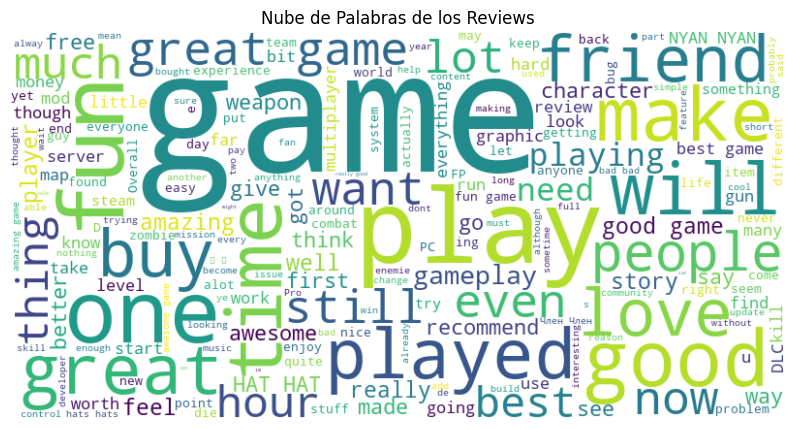

In [61]:

ruta_archivo =  r"M:\Documentos\Mai\Henry\Cursado\P.I. 1\Bases de datos\Archivos Originales CSV\user_reviews.parquet"
df_reviews = pd.read_parquet(ruta_archivo)

# Unir todos los textos de la columna 'reviews' en un solo string
all_reviews = " ".join(review for review in df_reviews['review'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(all_reviews)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes
plt.title('Nube de Palabras de los Reviews')
plt.show()
